In [23]:
# Homework

    #a) Use the Recursion method, Tabulation method, and matrix method to calculate the time spent for different n (e.g. 1, 10, 100, 1000, 10000, … uniform in the log space). (caution: recursion method will break when n>100)

    #b) plot log(time) (y-axis) vs. log(n) (x-axis) for different methods. 
       
    #c) Discuss the complexity of each method.
    
#Recursion Method
import numpy as np
import matplotlib.pyplot as plt
import time
def fib2(n):
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib2(n-1)+fib2(n-2)

In [24]:
n2 = np.arange(1, 40, 2) #as this goes on the time to reach a higher n integer increases. So I capped it at 40 
time2=np.zeros(n2.size)
for i in range(n2.size):
    start_time = time.time()
    temp=fib2(n2[i])
    time2[i] = time.time()-start_time
    print(n2[i],time2[i])
    print("--- %s seconds ---" % (time.time() - start_time))

1 3.0994415283203125e-06
--- 4.00543212890625e-05 seconds ---
3 2.1457672119140625e-06
--- 6.9141387939453125e-06 seconds ---
5 3.0994415283203125e-06
--- 5.9604644775390625e-06 seconds ---
7 4.0531158447265625e-06
--- 7.152557373046875e-06 seconds ---
9 1.0013580322265625e-05
--- 1.3113021850585938e-05 seconds ---
11 2.288818359375e-05
--- 2.5987625122070312e-05 seconds ---
13 6.103515625e-05
--- 6.389617919921875e-05 seconds ---
15 0.0001609325408935547
--- 0.000164031982421875 seconds ---
17 0.0004658699035644531
--- 0.0004909038543701172 seconds ---
19 0.0011320114135742188
--- 0.0011360645294189453 seconds ---
21 0.002958059310913086
--- 0.002962350845336914 seconds ---
23 0.007982254028320312
--- 0.008004188537597656 seconds ---
25 0.021172046661376953
--- 0.021197795867919922 seconds ---
27 0.05269789695739746
--- 0.052728891372680664 seconds ---
29 0.13603878021240234
--- 0.136063814163208 seconds ---
31 0.3579890727996826
--- 0.35810208320617676 seconds ---
33 0.93814182281494

In [27]:
#Tabulation Method
def fib4(n):
    table=[0]*(n+1)
    table[1] = 1
    for i in range(2,n+1):
        table[i]=table[i-1]+table[i-2]
        
    return table[n]
nlist1 = np.array([10**i for i in range (5)])
time3=np.zeros(nlist1.size)
for i in range(nlist1.size):
    start_time = time.time()
    temp=fib4(nlist1[i])
    time3[i] = time.time()-start_time
    print(nlist1[i],time3[i])
    print("--- %s seconds ---" % (time.time() - start_time))

1 4.76837158203125e-06
--- 2.7894973754882812e-05 seconds ---
10 2.86102294921875e-06
--- 6.9141387939453125e-06 seconds ---
100 4.76837158203125e-06
--- 7.867813110351562e-06 seconds ---
1000 6.29425048828125e-05
--- 6.67572021484375e-05 seconds ---
10000 0.0024261474609375
--- 0.002440214157104492 seconds ---


In [28]:
#Matrix Method
def arrpow(arr, n):
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib5(n):
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]
    return f


In [29]:
nlist3 = np.array([10**i for i in range (5)])
time4=np.zeros(nlist3.size)
for i in range(nlist3.size):
    start_time = time.time()
    temp=fib4(nlist3[i])
    time4[i] = time.time()-start_time
    print(nlist3[i],time4[i])
    print("--- %s seconds ---" % (time.time() - start_time))

1 2.9087066650390625e-05
--- 5.2928924560546875e-05 seconds ---
10 2.1457672119140625e-06
--- 5.9604644775390625e-06 seconds ---
100 5.0067901611328125e-06
--- 7.867813110351562e-06 seconds ---
1000 6.008148193359375e-05
--- 6.29425048828125e-05 seconds ---
10000 0.0024640560150146484
--- 0.002471923828125 seconds ---


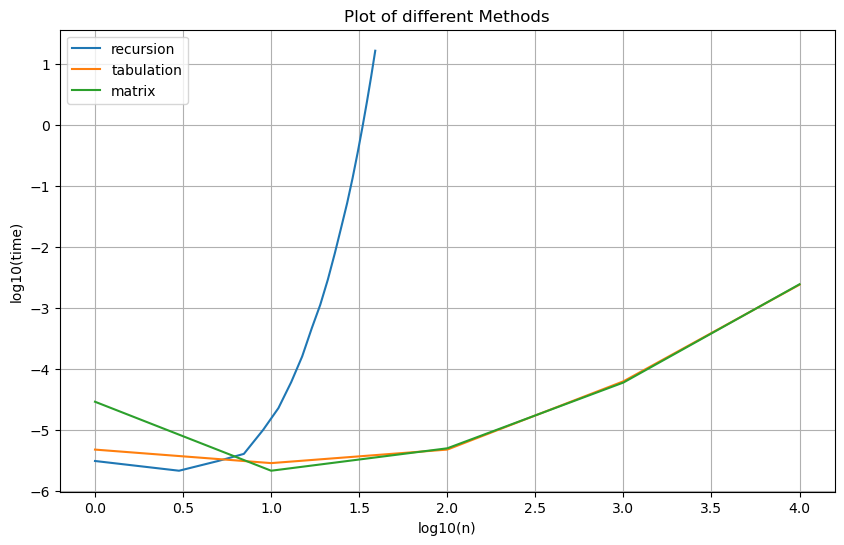

In [37]:
plt.figure(figsize = (10,6))
plt.title('Plot of different Methods')
plt.ylabel('log10(time)')
plt.xlabel('log10(n)')
plt.plot(np.log10(n2), np.log10(time2), label = 'recursion')
plt.plot(np.log10(nlist1), np.log10(time3), label = 'tabulation')
plt.plot(np.log10(nlist3), np.log10(time4), label = 'matrix')
plt.legend(loc = "upper left")
plt.grid(True)
plt.show()


1) For "Recursion Method" as (n) got larger the amount of time increased exponetially with each call back to the original solution becoming more intensive. "Recursion Method" is also O(2^n)
2) For small (n) the "Matrix Method" takes a bit longer, my guess is because of it need to startup the matrix itself but as n get larger it faster but then slows down the longer time goes. I believe this is O(logn)
3) For "Tabulation Method" it seems quite similar to matrix method except it does not have to startup the matrix and it is very close to a straight line so this is O(n)
4) Note: I think matrix and tabulation are not supposed to be this similar but they are because of my code looking back.